In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time, warnings, os, re, sys
import datetime as dt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.dirname("../")))
from modules import edaViz

## 1. Overall

In [2]:
trainLabels = pd.read_csv('../dataset/origin/train.csv')
testLabels = pd.read_csv('../dataset/origin/test.csv')

edaViz.printInfo('trainLabels', trainLabels)
edaViz.printInfo('testLabels', testLabels)

trainLabels information :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


testLabels information :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB




In [4]:
edaViz.printDescribe('trainLabels', trainLabels)
edaViz.printDescribe('testLabels', testLabels)

trainLabels Describe :  
            feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068 


testLabels Describe :  
           feature_1      feature_2      feature_3
count  123623.00000  123623.000000  123623.000000
mean        3.10926       1.741796       0.564377
std         1.18911       0.749195       0.495840
min         1.00000       1.000000       0.000000
25%         2.00000       1.000000       0.000000
50%         3.00000       2.000000       1.000000
75

## 2. first active month

- split to year and month

In [34]:
print(trainLabels['first_active_month'].head(10))
print("\n\n",type(trainLabels['first_active_month'][0]))

0    2017-06
1    2017-01
2    2016-08
3    2017-09
4    2017-11
5    2016-09
6    2016-12
7    2017-09
8    2017-08
9    2016-08
Name: first_active_month, dtype: object


 <class 'str'>


In [35]:
trainLabels['first_active_year'], trainLabels['first_active_month'] = edaViz.preFirstActiveMonth(trainLabels)
testLabels['first_active_year'], testLabels['first_active_month'] = edaViz.preFirstActiveMonth(testLabels)

## 3. Features

In [9]:
# features
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']])
edaViz.printUniqCount(testLabels[['feature_1','feature_2','feature_3']])

feature_1 Unique :  
 [5 4 2 1 3] 

feature_1 Count :  
 3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [2 1 3] 

feature_2 Count :  
 1    89242
2    74839
3    37836
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    114198
0     87719
Name: feature_3, dtype: int64 


feature_1 Unique :  
 [3 2 5 1 4] 

feature_1 Count :  
 3    44719
2    34115
5    25051
4    12332
1     7406
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [3 1 2] 

feature_2 Count :  
 1    54775
2    45993
3    22855
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    69770
0    53853
Name: feature_3, dtype: int64 




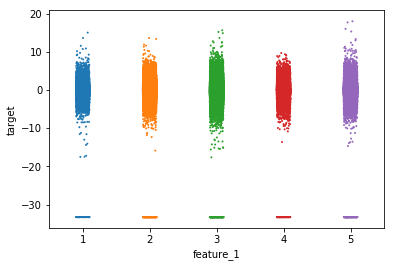

In [16]:
sns.stripplot(x=trainLabels['feature_1'], y=trainLabels['target'], size=2)

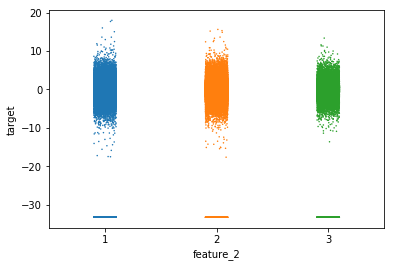

In [21]:
sns.stripplot(x=trainLabels['feature_2'], y=trainLabels['target'], size=1.5)

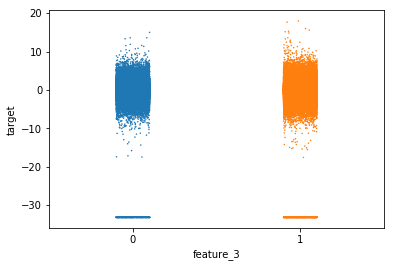

In [20]:
sns.stripplot(x=trainLabels['feature_3'], y=trainLabels['target'], size=1.5)

In [26]:
targetMin = trainLabels['target'].min()
targetMax = trainLabels['target'].max()
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']][trainLabels['target']==targetMin])
edaViz.printUniqCount(trainLabels[['feature_1','feature_2','feature_3']][trainLabels['target']==targetMax])

feature_1 Unique :  
 [3 4 2 5 1] 

feature_1 Count :  
 3    771
2    592
5    534
4    213
1     97
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [1 3 2] 

feature_2 Count :  
 1    1016
2     655
3     536
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1 0] 

feature_3 Count :  
 1    1305
0     902
Name: feature_3, dtype: int64 


feature_1 Unique :  
 [5] 

feature_1 Count :  
 5    1
Name: feature_1, dtype: int64 


feature_2 Unique :  
 [1] 

feature_2 Count :  
 1    1
Name: feature_2, dtype: int64 


feature_3 Unique :  
 [1] 

feature_3 Count :  
 1    1
Name: feature_3, dtype: int64 




In [29]:
print(trainLabels['target'][trainLabels['target']>targetMin].min())
print(targetMax)

-17.60814651
17.9650684


In [30]:
trainLabels['lowerBound'] = (trainLabels['target']==targetMin)

## 4. Exit

In [39]:
trainLabels.to_csv("../dataset/edaViz/train_edaViz.csv", index=False)
testLabels.to_csv("../dataset/edaViz/test_edaViz.csv", index=False)